### Using Pandas-like Functions with Dask Dataframes
Notice that there is practically no syntax change between using Pandas and dask.  The main difference is whether a pandas data frame or a dask dataframe is used.  A Dask dataframe is set up so that data can be distributed among workers.  Pandas dataframes do not do such functions in their native state.

In [2]:
#!sudo apt-get install graphviz -y

In [3]:
#!pip install lz4==3.1.3 msgpack==1.0.2 toolz==0.11.1 dask==2021.10.0 distributed==2021.10.0 --user

In [8]:
from dask.distributed import Client
import os

service_host = os.environ["DASK_SCHEDULER_SERVICE_HOST"]
service_port = os.environ["DASK_SCHEDULER_SERVICE_PORT"]
client = Client(f"{service_host}:{service_port}")

# look at the client and scheduler

client

<Client: 'tcp://10.0.88.99:8786' processes=3 threads=3, memory=12.00 GiB>

In [9]:
import pandas as pd
pdf = pd.read_parquet("/mnt/data/ny-taxi/")
pdf.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN
5,1,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.60,1.0,N,224,68,1,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,NaN
6,1,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.10,1.0,N,95,157,2,16.0,0.5,0.5,0.00,0.0,0.3,17.30,0.0,NaN
7,1,2021-01-01 00:12:29,2021-01-01 00:30:34,1.0,5.70,1.0,N,90,40,2,18.0,3.0,0.5,0.00,0.0,0.3,21.80,2.5,NaN
8,1,2021-01-01 00:39:16,2021-01-01 01:00:13,1.0,9.10,1.0,N,97,129,4,27.5,0.5,0.5,0.00,0.0,0.3,28.80,0.0,NaN
9,1,2021-01-01 00:26:12,2021-01-01 00:39:46,2.0,2.70,1.0,N,263,142,1,12.0,3.0,0.5,3.15,0.0,0.3,18.95,2.5,NaN


In [10]:
pdf.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.044101e+07,1.005161e+07,1.044101e+07,1.005161e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.005161e+07,8.780194e+06
mean,1.712793e+00,1.392862e+00,5.547368e+00,1.373423e+00,1.654255e+02,1.630821e+02,1.182828e+00,1.323068e+01,1.012918e+00,4.914771e-01,2.448910e+00,4.009295e-01,2.967094e-01,1.953560e+01,2.289231e+00,8.175930e-02
std,5.134696e-01,9.899675e-01,5.671657e+02,5.572937e+00,6.567640e+01,7.058145e+01,5.086794e-01,1.247695e+02,1.240425e+00,8.269968e-02,2.885395e+00,1.758910e+00,4.387661e-02,1.250969e+02,7.342442e-01,3.112999e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.950000e+02,-5.500000e+00,-5.000000e-01,-1.880000e+02,-8.300000e+01,-3.000000e-01,-8.953000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.070000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.300000e-01,0.000000e+00,3.000000e-01,1.176000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,2.050000e+00,0.000000e+00,3.000000e-01,1.480000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.210000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,3.060000e+00,0.000000e+00,3.000000e-01,2.076000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.487985e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.710000e+01,1.140440e+03,8.117500e+02,3.000000e-01,4.010956e+05,3.000000e+00,1.250000e+00


In [11]:
import dask.dataframe as dd

df = dd.read_parquet("/mnt/data/ny-taxi/")
df.head()                     

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN


In [12]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [14]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [15]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
npartitions=1,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [16]:
df.describe().compute()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.044101e+07,1.005161e+07,1.044101e+07,1.005161e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.044101e+07,1.005161e+07,8.780194e+06
mean,1.712793e+00,1.392862e+00,5.547368e+00,1.373423e+00,1.654255e+02,1.630821e+02,1.182828e+00,1.323068e+01,1.012918e+00,4.914771e-01,2.448910e+00,4.009295e-01,2.967094e-01,1.953560e+01,2.289231e+00,8.175930e-02
std,5.134696e-01,9.899675e-01,5.671657e+02,5.572937e+00,6.567640e+01,7.058145e+01,5.086794e-01,1.247695e+02,1.240425e+00,8.269968e-02,2.885395e+00,1.758910e+00,4.387661e-02,1.250969e+02,7.342442e-01,3.112999e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.950000e+02,-5.500000e+00,-5.000000e-01,-1.880000e+02,-8.300000e+01,-3.000000e-01,-8.953000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.184000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.830000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.150000e+00,0.000000e+00,3.000000e-01,1.536000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.400000e+00,1.000000e+00,2.360000e+02,2.360000e+02,1.000000e+00,1.550000e+01,2.500000e+00,5.000000e-01,3.260000e+00,0.000000e+00,3.000000e-01,2.182000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.487985e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.710000e+01,1.140440e+03,8.117500e+02,3.000000e-01,4.010956e+05,3.000000e+00,1.250000e+00


In [17]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN


In [18]:
#This example shows how to slice the data based on a mask condition and then determine the 
# standard deviation of the data in the trip_distance column
df2 = df[df.passenger_count > 1.0]
df3 = df2.groupby("VendorID").trip_distance.std()
df3

Dask Series Structure:
npartitions=1
    float64
        ...
Name: trip_distance, dtype: float64
Dask Name: sqrt, 23 tasks

In [19]:
computed_df = df3.compute()

In [20]:
df3.head()

VendorID
1    4.706070
2    4.495954
Name: trip_distance, dtype: float64

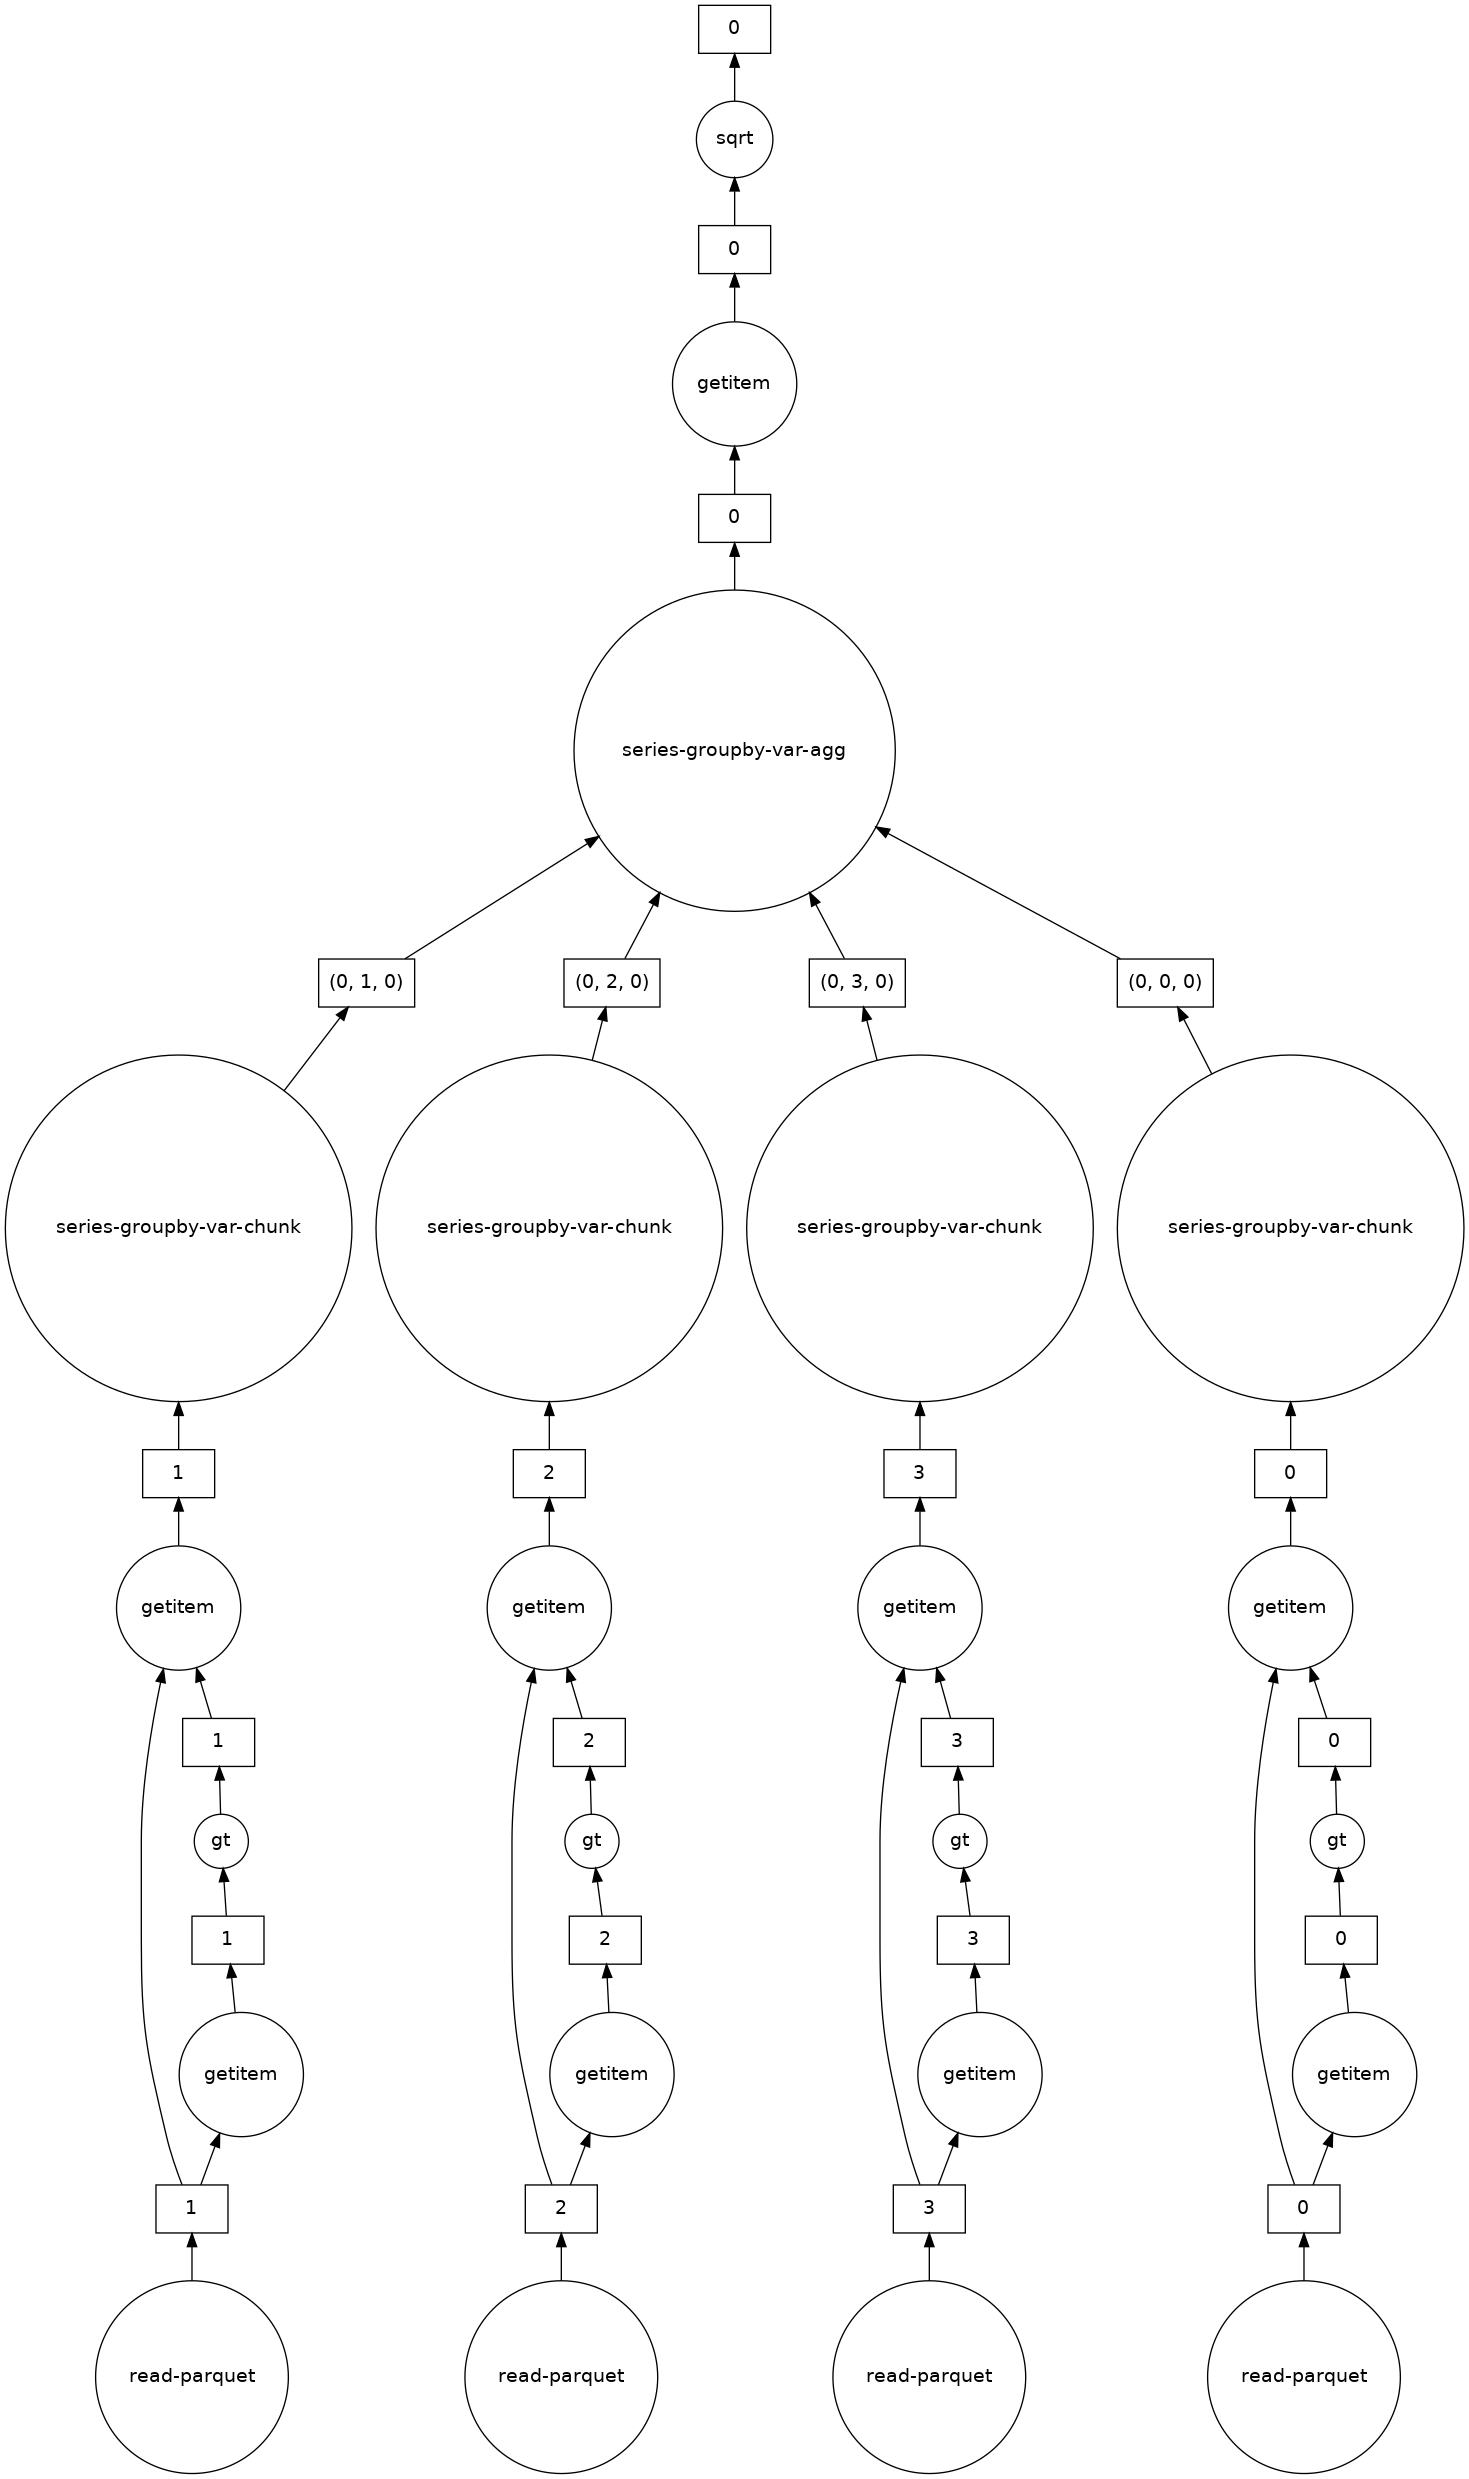

In [21]:
df3.visualize()

In [22]:
#Another example calculation is to aggregate multiple columns, as shown below.
df4 = df.groupby("VendorID").aggregate({"trip_distance": "sum", "passenger_count": "max"})
df4.compute

<bound method DaskMethodsMixin.compute of Dask DataFrame Structure:
              trip_distance passenger_count
npartitions=1                              
                    float64         float64
                        ...             ...
Dask Name: aggregate-agg, 9 tasks>

In [23]:
df4.head()

,trip_distance,passenger_count
VendorID,,
1,9248587.00,8.0
2,48424651.76,9.0
6,245779.43,NaN
5,1125.65,NaN


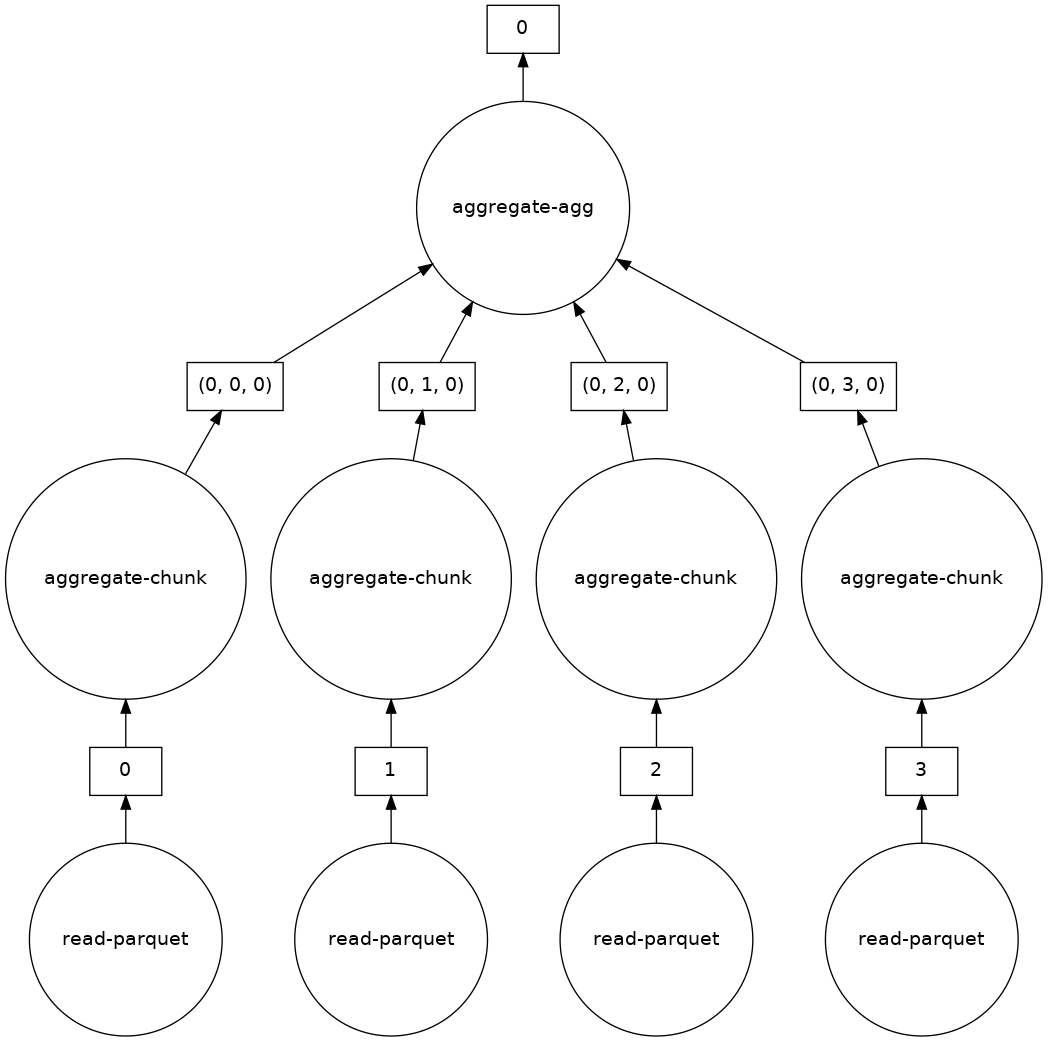

In [24]:
df4.visualize()

### K-means clustering using Sklearn Natively versus Dask's Machine Learning Library

This example shows at least a five-fold faster training using Dask's Machine Learning library with syntax very similar to sci-kit learn.  Running using the Dask library will distribute training across nodes.  



Using Sci-kit Learn natively on Dask we see a training time as noted below.

In [25]:
# import libraries

from sklearn import cluster
import time
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
X, y = datasets.make_blobs(n_samples=10**8, random_state=0,
                                   centers=3)

In [27]:
%%time

km = cluster.KMeans(n_clusters=3)
km.fit(X)

CPU times: user 4min 53s, sys: 57.5 s, total: 5min 51s
Wall time: 2min 55s


KMeans(n_clusters=3)

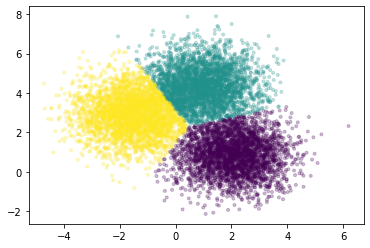

In [28]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

Using Dask's ML library we make very minor code changes, but have a large speed-up of training time.

In [29]:
## import dask ml libraries

import dask_ml.datasets
import dask_ml.cluster
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
X, y = dask_ml.datasets.make_blobs(n_samples=10**8,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(100000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

In [31]:
%%time

km = dask_ml.cluster.KMeans(init='k-means||', n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

CPU times: user 1.67 s, sys: 54.9 ms, total: 1.72 s
Wall time: 39.6 s


KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

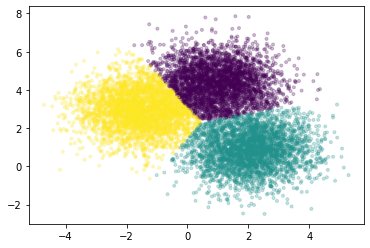

In [7]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);